In [2]:
# load libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
# load the data
ds = xr.open_dataset('TREFHTMN_TREFHTMX_82N62W_B20TRC5CNBDRD.f09_g16.002.cam.h1.19200101-20051231.nc')

In [11]:
# look at your data, xarray works w/datasets 
# datasets provides more vars than dataarrays, there can be var temp and precip @ same coordinates (lat, long, time) but datarrays would only have temp OR precip (single multi dim var w/coordinates)
ds

<xarray.Dataset>
Dimensions:   (time: 31390)
Coordinates:
    lat       float64 82.46
    lon       float64 62.5
  * time      (time) object 1920-01-01 00:00:00 ... 2005-12-31 00:00:00
Data variables:
    TREFHTMN  (time) float32 235.8 230.7 230.9 228.0 ... 243.0 263.7 259.8 258.4
    TREFHTMX  (time) float32 235.8 235.8 231.8 231.8 ... 265.3 265.5 264.1 270.1
Attributes:
    Description:  Minimum and maximum daily reference height temperature at 8...

In [14]:
# for convenience, storing the min and max data as its own array
tmin = ds.TREFHTMN
tmax = ds.TREFHTMX

In [12]:
# part of netcdf linux library, briefly look at netcdf files w/o going through python
# !ncdump -h TREFHTMN_TREFHTMX_82N62W_B20TRC5CNBDRD.f09_g16.002.cam.h1.19200101-20051231.nc

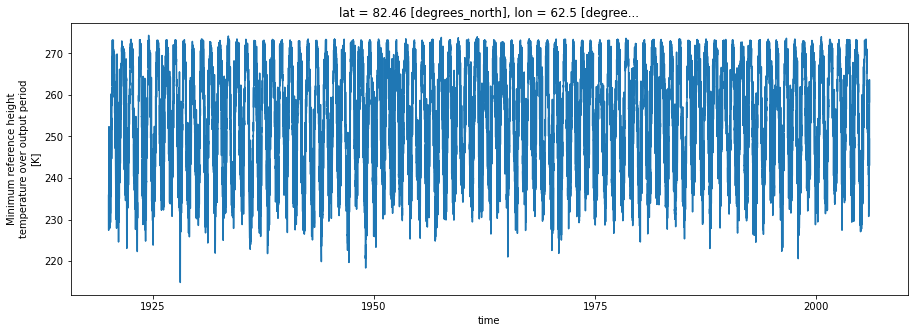

In [18]:
ds['TREFHTMN'].plot(figsize=(15,5))

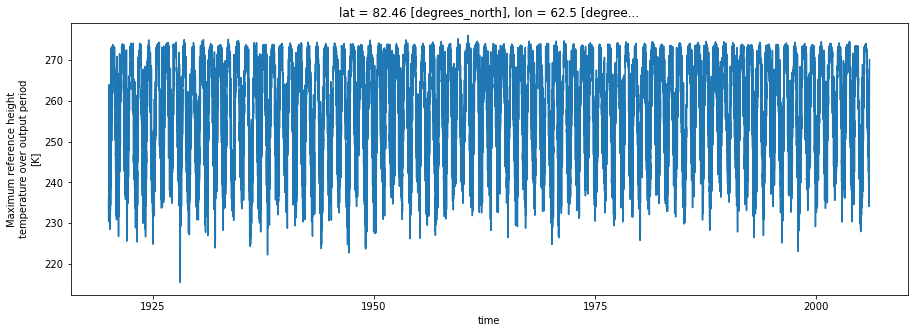

In [22]:
ds.TREFHTMX.plot(figsize=(15,5))
# same thing as above -> tmax.plot()

### How does plotting it as a time series help motivate why our heatwave definitions should use seasonal or sub-seasonal data?

1. Seasonal data or, seasonality, are cycles that repeat regularly over time. A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.

2. Subseasonal is defined as the period from 2 weeks to 3 months, and seasonal ranges from 3 months to 2 years.

3. The higher the Kelvin units are, the warmer it is becoming.

4. An annual cycle refers to a set of changes or events that uniformly, or consistently, take place at the same time of year.

### Answer:
We define a heatwave as three or more consecutive days above the 90th percentile for both max and min temperatures. In plotting the data as a time series, we can see how the hottest days and nights take place at the same time of year. What we're interested in are the hottest days and nights, and those seem to have a strong annual cycle. 

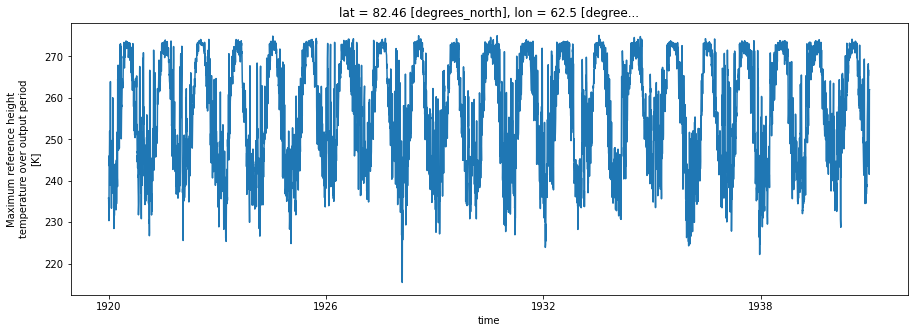

In [34]:
# look at seasonal data, yearly, 20yr interval
max_1920to40 = tmax.sel(time=slice('1920', '1940')).plot(figsize=(15,5))

### What does the figure max_1920to40 tell us? (above)

In the years from 1920 to 1940, the hottest days repeatedly occur in the middle of the year. 

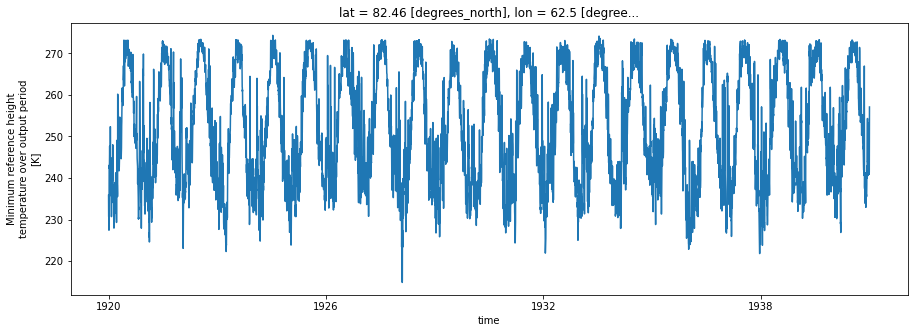

In [28]:
min_1920to40 = tmin.sel(time=slice('1920', '1940')).plot(figsize=(15,5))

### What does the figure min_1920to40 tell us? (above)

In the years form 1920 to 1940, the hottest nights repeatedly occur in the middle of the year. 

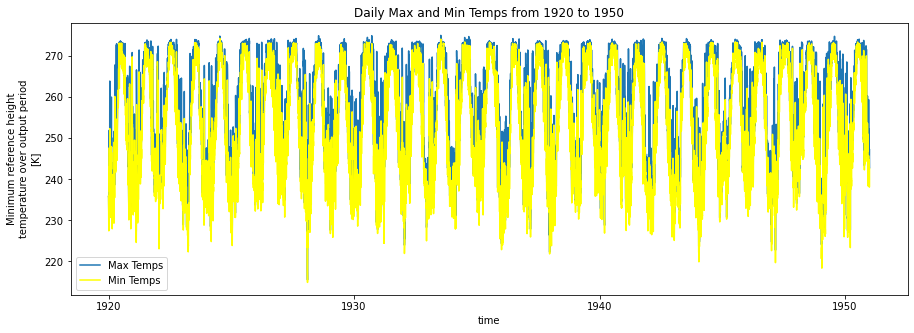

In [89]:
# look at seasonal data, yearly, 30yr interval
tmax.sel(time=slice('1920', '1950')).plot(figsize=(15,5), label='Max Temps');
tmin.sel(time=slice('1920', '1950')).plot(label='Min Temps', color='yellow');
plt.legend();
plt.title('Daily Max  Min Temps from 1920 to 1950');

We can reach an identical conclusion as the one above where the hottest days and nights occur at the same time of the year. 

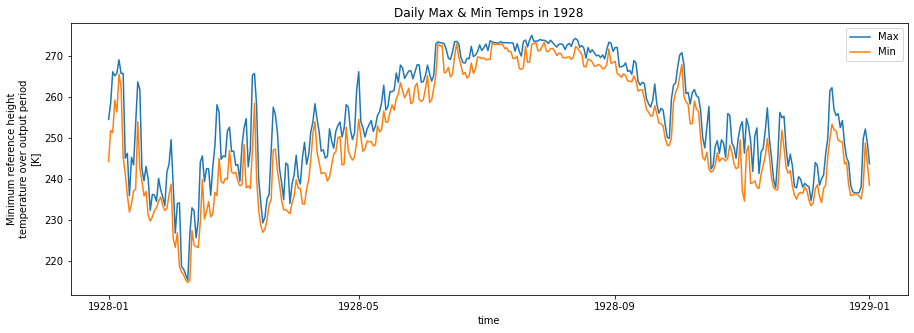

In [87]:
# look at seasonal data, yearly
tmax_1928 = tmax.sel(time=slice('1928-01-01', '1929-01-01')).plot(figsize=(15,5), label='Max');
tmin.sel(time=slice('1928-01-01', '1929-01-01')).plot(label='Min');
plt.legend();
plt.title('Daily Max & Min Temps in 1928');

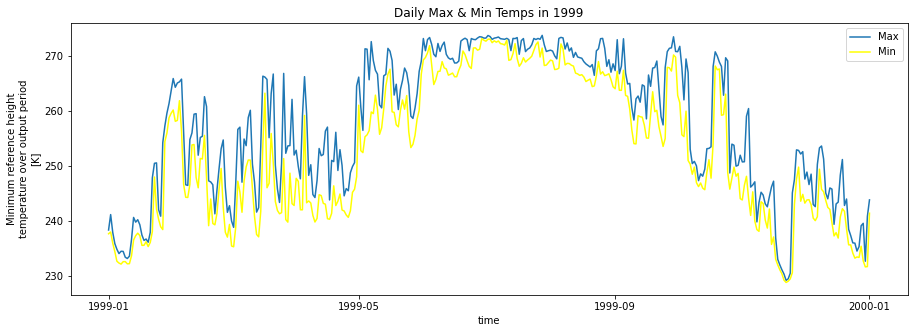

In [81]:
tmax_1999 = tmax.sel(time=slice('1999-01-01', '2000-01-01')).plot(figsize=(15,5), label='Max')
tmin.sel(time=slice('1999-01-01', '2000-01-01')).plot(color='yellow', label='Min')
plt.legend();
plt.title('Daily Max & Min Temps in 1999');

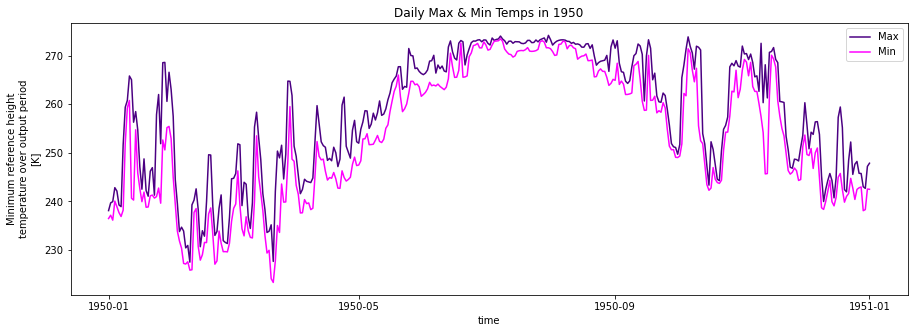

In [82]:
tmax_1950 = tmax.sel(time=slice('1950-01-01', '1951-01-01')).plot(figsize=(15,5), color='indigo', label='Max')
tmin.sel(time=slice('1950-01-01', '1951-01-01')).plot(color='magenta', label='Min');
plt.legend();
plt.title('Daily Max & Min Temps in 1950');

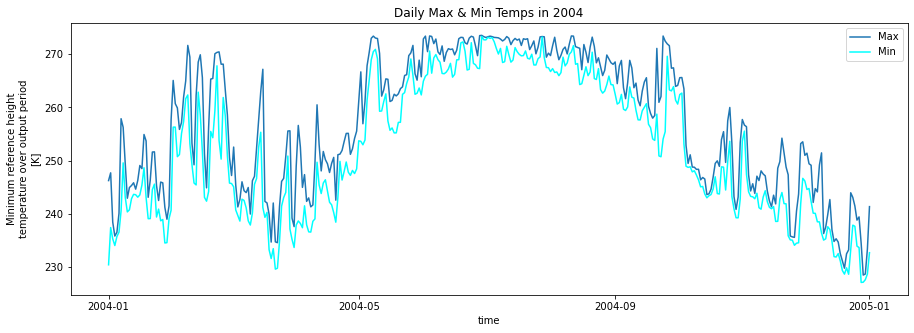

In [83]:
tmax_2004 = tmax.sel(time=slice('2004-01-01', '2005-01-01')).plot(figsize=(15,5), label='Max')
tmin.sel(time=slice('2004-01-01', '2005-01-01')).plot(color='aqua', label='Min');
plt.legend();
plt.title('Daily Max & Min Temps in 2004');